In [3]:
import torch 
import matplotlib.pyplot as plt
%matplotlib inline


## Modelo según Morrison et al 2007

El modelo plantea STDP en sinapsis excitatorias. Puede llegar a aplicarse a las sinapsis entre neuronas piramidales y espinosas estriatales. 

Hice un modificación a $\alpha$ para obtener una atenuación $\Delta w = 40 \% $ para un $ \Delta t = -6.3 ms$.

El paper plantea $\alpha = 0.11$, yo lo puse en $\alpha = 5.478$.


In [9]:
def deltaw_Morr(deltat,w):
    # constantes
    mu = 0.4
    tau = 20.0  # ms
    w0 = 1.0  # pA
    lamb = 0.1
    alpha = 5.478 # originalmente estaba en 0.11, pero no daba con una reducción de 40% a -6.3msg
    
    out = torch.zeros(len(deltat))
    aux = torch.exp(-torch.abs(deltat)/tau)
    out = lamb * (w0 ** (1 - mu)) * (w ** mu) * aux * ((deltat > 0)*1.0)
    out -= lamb * alpha * w * aux * ((deltat < 0) * 1.0)
    return out
    

In [5]:
deltaw(torch.tensor([-6.3]), torch.tensor([1]))

tensor([-0.3998])

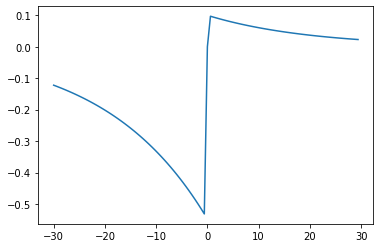

In [10]:
# defino un vector de pesos
w = torch.ones(100) * 1

# defino vector de tiempos
extremo = 60 #mseg
dt = (torch.tensor(range(len(w))) - len(w)/2)/(len(w/2)) * extremo

out = deltaw_Morr(dt,w)

plt.plot(dt.numpy(), out.numpy())
plt.show()


# Modelo STDP correspondiente al Estriado

## Sinapsis cortico estriatal

Fino et all 2005 estudiaron la interacción entre neuronas del layer V cortical y las neuronas espinosas estriatales. En este paper no consideran un tercer factor, es decir neurotransmisores que modulan el aprendizaje, como la dopamina y acetilcolina. Determinan que estimulación con pulsos de alta frecuencia (HFS) imponen procesos LTP, principalmente por mecanismos pre-sinapticos. Por otro lado, la estimulación en baja frecuencia (LFS) produce LTD a partir de procesos postsinápticos. 

### Reversed STDP

En otro experimento evocan un potencial de acción (AP) en la neurona estriatal, y aplican un corriente depolarizante supraumbral en la neurona cortical, se plantean dos situaciones:
- **pre-post**: la corriente depolarizante se aplica previo al potencial de acción. Esta situación plantea la situación donde la actividad pre-sinaptica evoca un AP en la post-sinapsis.
- **post-pre**: en este caso, la actividad post sinaptica, es decir el AP, ocurre primero. Busca simular el caso donde la actividad pre-sinaptica no está participando en la generación del AP post sináptico. 

La siguiente figura muestra los resultados de este experimento.
<img src="img/fino_2005.png" alt="drawing" width="500"/> 

Es interesante notar que el STPD está invertido. Es decir, la actividad **pre-post** plantea un aprendizaje **LTD**, mientras que **post-pre** plantea un aprendizaje **LTP**. 

Este descubrimiento fue muy interesante, por una parte porque encuentra un modelo STDP anti-Hebbiano en una estructura importante como es el estriado. Pero también plantea una estructura donde la información que no evoca un AP es relevante para la estructura. Esto puede significar que el estriado ¨busca¨ relacionar información temporal, ya que esa información presinaptica, que no activa la neurona, lo hará en un futuro, ya que se potencia mediante LTP, y todo en una ventana de $\pm 30 mseg$.

Este paper no considera terceros factores.



In [4]:
def deltaw_ctx_spn(deltat,w):
    # constantes
    mu = 0.4
    tau = 20.0  # ms
    w0 = 1.0  # pA
    lamb = 0.1
    alpha = 5.478 # originalmente estaba en 0.11, pero no daba con una reducción de 40% a -6.3msg
    
    out = torch.zeros(len(deltat))
    aux = torch.exp(-torch.abs(deltat)/tau)
    out -= lamb * (w0 ** (1 - mu)) * (w ** mu) * aux * ((deltat > 0)*1.0)
    out = lamb * alpha * w * aux * ((deltat < 0) * 1.0)
    return out

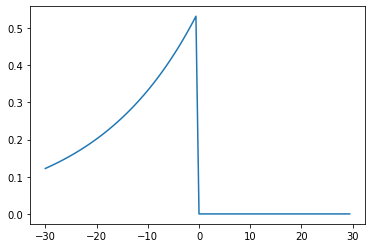

In [6]:
# defino un vector de pesos
w = torch.ones(100) * 1

# defino vector de tiempos
extremo = 60 #mseg
dt = (torch.tensor(range(len(w))) - len(w)/2)/(len(w/2)) * extremo

out = deltaw_ctx_spn(dt,w)

plt.plot(dt.numpy(), out.numpy())
plt.show()

In [50]:
out[torch.logical_and(dt<-6,dt>-7) ]


tensor([-0.0079])

In [17]:
a=(torch.randn(10)>0)*5
len(a)

10

In [15]:
torch.exp(torch.tensor([1.]))


tensor([2.7183])

In [29]:
((torch.zeros(10)+2)**2) * (torch.zeros(10)+2)

tensor([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

In [60]:
lamb * (w0 ** (1 - mu)) * (w ** mu)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])